In [145]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt


In [146]:
def generate_gps_data(n_points=100, spoof_point=70, spoof_distance=0.01):
    lat, lon = 12.9716, 77.5946  # Starting location
    gps_data = []
    for i in range(n_points):
        if i == spoof_point:
            lat += spoof_distance  # Simulate spoofing with a big jump
            lon += spoof_distance
            true_spoofed = 1
        else:
            lat += np.random.uniform(-0.001, 0.001)
            lon += np.random.uniform(-0.001, 0.001)
            true_spoofed = 0
        gps_data.append((lat, lon, true_spoofed))
    print(gps_data)
    return pd.DataFrame(gps_data, columns=["latitude", "longitude", "true_spoofed"])


In [147]:
gps_df = generate_gps_data()

[(12.971901068501705, 77.5955991511752, 0), (12.97275337546112, 77.59613230758758, 0), (12.973149043195695, 77.59594252955245, 0), (12.972958499561141, 77.59673162932502, 0), (12.97343155796782, 77.59665498438288, 0), (12.974396627189513, 77.59701255250478, 0), (12.974024873751986, 77.59635258093313, 0), (12.974935831642496, 77.59588773608837, 0), (12.975194610131137, 77.59536913682571, 0), (12.974398474199328, 77.59443902385694, 0), (12.975247806484669, 77.59431002255405, 0), (12.975740296326943, 77.59506205040577, 0), (12.975291909693953, 77.59587094993473, 0), (12.975950994620064, 77.59574686269472, 0), (12.975242058511203, 77.59483739360032, 0), (12.974495498834989, 77.59503333600155, 0), (12.97376078636969, 77.59449911822786, 0), (12.973608819966504, 77.59489691619117, 0), (12.973818806621185, 77.59574005675374, 0), (12.974522649341997, 77.59519849045364, 0), (12.973930587304036, 77.59476059440041, 0), (12.97470363523925, 77.59544838381807, 0), (12.975597706724955, 77.595589658370

In [148]:
gps_df.head()

,latitude,longitude,true_spoofed
0,12.971901,77.595599,0
1,12.972753,77.596132,0
2,12.973149,77.595943,0
3,12.972958,77.596732,0
4,12.973432,77.596655,0


In [149]:
gps_df = compute_speed(gps_df)
gps_df = compute_acceleration(gps_df)
gps_df = detect_spoofing(gps_df, acc_threshold=30)


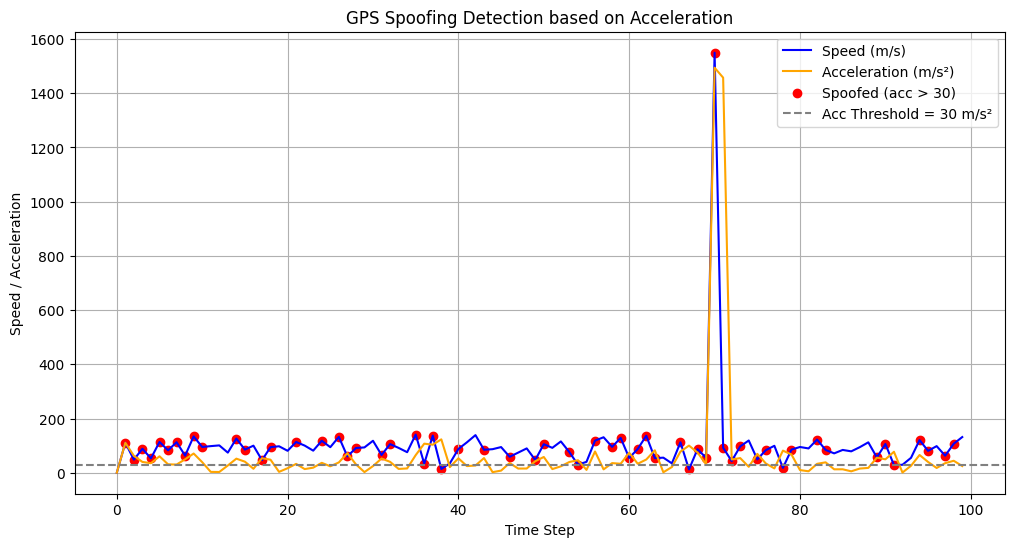

In [150]:
plt.figure(figsize=(12, 6))
plt.plot(gps_df["speed_mps"], label="Speed (m/s)", color="blue")
plt.plot(gps_df["acceleration_mps2"], label="Acceleration (m/s²)", color="orange")
plt.scatter(gps_df[gps_df["spoofed"] == 1].index,
            gps_df[gps_df["spoofed"] == 1]["speed_mps"],
            color="red", label="Spoofed (acc > 30)")

plt.axhline(30, color="gray", linestyle="--", label="Acc Threshold = 30 m/s²")
plt.xlabel("Time Step")
plt.ylabel("Speed / Acceleration")
plt.title("GPS Spoofing Detection based on Acceleration")
plt.legend()
plt.grid(True)
plt.show()


Effectiveness of Model

In [151]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = gps_df["true_spoofed"]
y_pred = gps_df["spoofed"]

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Spoofed"]))


Confusion Matrix:
[[40 59]
 [ 0  1]]

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.40      0.58        99
     Spoofed       0.02      1.00      0.03         1

    accuracy                           0.41       100
   macro avg       0.51      0.70      0.30       100
weighted avg       0.99      0.41      0.57       100

